In [2]:
# 데이터 생성 및 연산을 위한 라이브러리
import numpy as np

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D 시각화
from matplotlib import cm # 컬러맵

# 가우시안 혼합 모델을 위한 라이브러리
from sklearn.mixture import GaussianMixture

# 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')

print("라이브러리 임포트 완료")

라이브러리 임포트 완료


In [3]:
import numpy as np

def generate_3d_cubic_data(n_samples=150, noise=0.0):
    """
    3차원 Twisted cubic 데이터를 생성하는 함수

    Args:
        n_samples (int): 생성할 샘플의 개수
        noise (float): 데이터에 추가할 노이즈의 강도

    Returns:
        np.ndarray: 생성된 (n_samples, 3) 모양의 데이터 배열
    """
    t = np.linspace(-5, 5, n_samples)
    x = t
    y = t**2
    z = t**3

    # 데이터를 (n_samples, 3) 형태로 결합
    data = np.vstack([x, y, z]).T

    # 노이즈 추가 (현재는 0으로 설정)
    if noise > 0:
        data += np.random.normal(scale=noise, size=data.shape)

    return data

# 데이터 생성
data_3d = generate_3d_cubic_data()
print(f"데이터 생성 완료: {data_3d.shape} 형태")

데이터 생성 완료: (150, 3) 형태


In [4]:
import numpy as np
from sklearn.mixture import GaussianMixture

def find_best_gmm(data, max_components=15):
    """
    AIC와 BIC를 사용하여 최적의 GMM을 찾는 함수

    Args:
        data (np.ndarray): 분석할 데이터
        max_components (int): 테스트할 최대 컴포넌트 개수

    Returns:
        tuple: (최적 GMM 모델, AIC 점수 리스트, BIC 점수 리스트)
    """
    n_components_range = np.arange(1, max_components + 1)
    aics = []
    bics = []

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=0)
        gmm.fit(data)
        aics.append(gmm.aic(data))
        bics.append(gmm.bic(data))

    # BIC가 가장 낮은 모델을 최적 모델로 선택
    best_bic_idx = np.argmin(bics)
    best_n_components = n_components_range[best_bic_idx]
    best_gmm = GaussianMixture(n_components=best_n_components, random_state=0)
    best_gmm.fit(data)

    return best_gmm, aics, bics

print("GMM 분석 모듈 (find_best_gmm 함수) 정의 완료")

GMM 분석 모듈 (find_best_gmm 함수) 정의 완료


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_results(data, gmm_model, aics, bics):
    """
    GMM 실험 결과를 시각화하는 함수

    Args:
        data (np.ndarray): 원본 데이터
        gmm_model (GaussianMixture): 학습된 최적 GMM 모델
        aics (list): AIC 점수 리스트
        bics (list): BIC 점수 리스트
    """
    fig = plt.figure(figsize=(18, 6))

    # 1. 원본 데이터 3D 시각화
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 0], cmap='viridis', s=20)
    ax1.set_title('Original 3D Data') # 원본 3D 데이터
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # 2. AIC / BIC 점수 그래프
    ax2 = fig.add_subplot(132)
    n_components_range = np.arange(1, len(aics) + 1)
    ax2.plot(n_components_range, aics, marker='o', label='AIC')
    ax2.plot(n_components_range, bics, marker='x', label='BIC')
    ax2.set_title('AIC/BIC Scores') # AIC/BIC 점수
    ax2.set_xlabel('Number of Components') # 컴포넌트 개수
    ax2.set_ylabel('Score') # 점수
    # BIC가 가장 낮은 지점에 세로선 추가
    ax2.axvline(gmm_model.n_components, linestyle='--', color='r', label=f'Best (BIC): {gmm_model.n_components}')
    ax2.legend()

    # 3. GMM 클러스터링 결과 3D 시각화
    labels = gmm_model.predict(data)
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=20)
    ax3.set_title('GMM Clustering Result') # GMM 클러스터링 결과
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')

    plt.tight_layout()
    plt.savefig('gmm_3d_experiment_results.png')
    plt.show()

print("시각화 모듈 (plot_results 함수) 정의 완료")

시각화 모듈 (plot_results 함수) 정의 완료


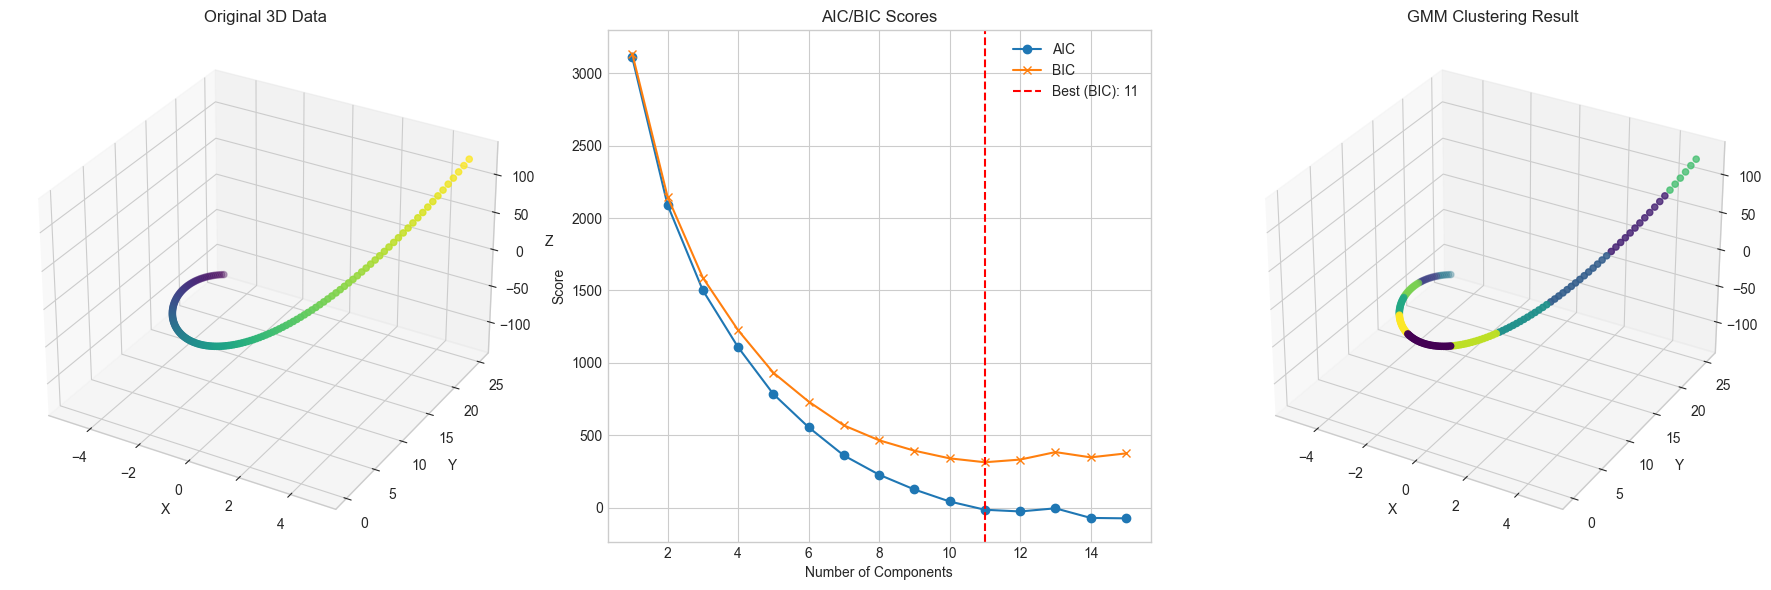

In [6]:
# === 메인 실행 로직 ===
# 1. 데이터 생성
dataset = generate_3d_cubic_data(n_samples=150)

# 2. 최적 GMM 탐색
best_model, model_aics, model_bics = find_best_gmm(dataset, max_components=15)

# 3. 결과 시각화
plot_results(dataset, best_model, model_aics, model_bics)